K-Nearest-Neighbor

[시각화](https://github.com/sitzikbs/gmm_tutorial/blob/master/visualization.py)

[knn 구현 참고](http://dataaspirant.com/2016/12/27/k-nearest-neighbor-algorithm-implementaion-python-scratch/)

[knn 구현 참고 2](https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/)

[knn 구현 참고 3](https://www.python-course.eu/k_nearest_neighbor_classifier.php)

[r contour 시각화](https://stats.stackexchange.com/questions/21572/how-to-plot-decision-boundary-of-a-k-nearest-neighbor-classifier-from-elements-o)

[knn Decision Boundaries plotly](https://plot.ly/scikit-learn/plot-voting-decision-regions/)

[numpy에서 replace 하는 방법](https://stackoverflow.com/questions/33529593/how-to-use-a-dictionary-to-translate-replace-elements-of-an-array)

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
import collections
from matplotlib.colors import LogNorm
import pandas as pd
import plotly.graph_objs as go
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

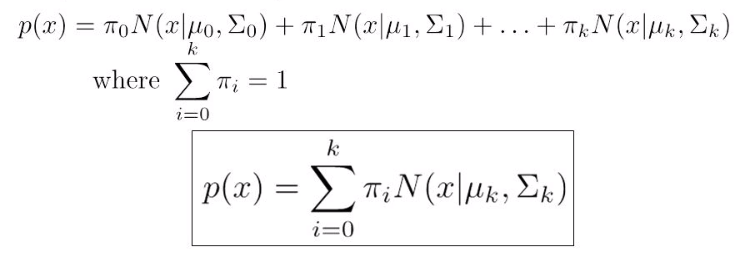

In [55]:
from IPython.display import display, Image
display(Image(filename='./img/Gaussian_Mixture.PNG'))

In [56]:
def mixture_5(mean = None , cov = None , p = None , N = 200 ) :
    X = np.random.choice( list(np.arange(0,len(p))) , size= N , p = p )
    count = np.bincount(X)
    a = np.random.multivariate_normal(mean[0], cov[0], count[0])
    b = np.random.multivariate_normal(mean[1], cov[1], count[1])
    c = np.random.multivariate_normal(mean[2], cov[2], count[2])
    d = np.random.multivariate_normal(mean[3], cov[3], count[3])
    e = np.random.multivariate_normal(mean[4], cov[4], count[4])
    return np.concatenate((a,b,c,d,e) , axis = 0)

In [57]:
mean = [(0,4) , (0,2), (3,4) , (0.5,1.5) , (1, 2.5)]
cov = [np.diag([1.0,1.0])] * 5
p =[ 0.3,0.3,0.2 ,0.1,0.1]
mix_1 = mixture_5(mean = mean , cov = cov , p =  p)
p =[ 0.2,0.3,0.2 ,0.2,0.1]
mean = [(-1.,-1) , (3.5 ,-0.5), (3,3) , (3.5,1.5) , (3.0, 1.5)]
cov = [np.diag([1.0,1.0])] * 5
mix_2 = mixture_5(mean = mean , cov = cov , p =  p)
label = ["red"] * 200  + ["blue"]  * 200
total  = np.concatenate((mix_1 , mix_2), axis = 0)

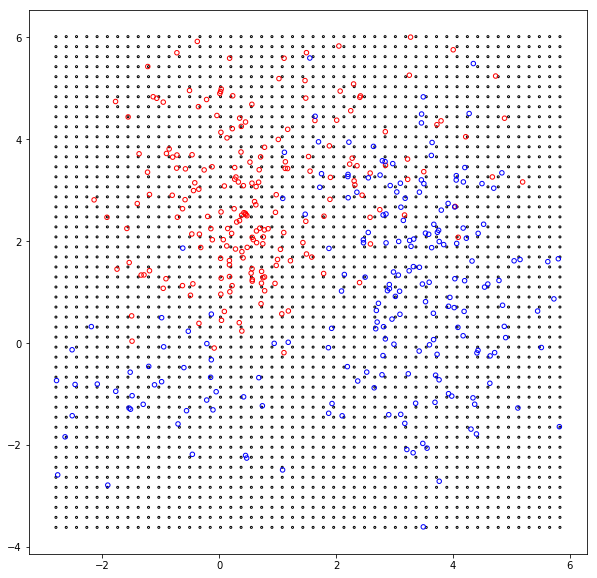

In [58]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
x_min, x_max = total[:,0].min() - .01, total[:,0].max() + .01
y_min, y_max = total[:,1].min() - .01, total[:,1].max() + .01

#ax.set_xticks(np.arange(x_min, x_max, 0.1))
#ax.set_yticks(np.arange(y_min , y_max, 0.1))
x = np.linspace(x_min , x_max , num = 50)
y = np.linspace(y_min, y_max  , num = 50)
x, y = np.meshgrid(x , y )
plt.scatter(x,y, s=4, facecolors='none', edgecolors= "black"  )
plt.scatter(total[:,0] , total[:,1] ,
            s=20, facecolors='none', edgecolors=label )
plt.show()

In [59]:
grid_n = 1000
x_min, x_max = total[:,0].min() - .01, total[:,0].max() + .01
y_min, y_max = total[:,1].min() - .01, total[:,1].max() + .01
x = np.linspace(x_min , x_max , num = grid_n)
y = np.linspace(y_min, y_max  , num = grid_n)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
gmm = GaussianMixture(n_components=5, covariance_type='diag')
gmm.fit(total[0:201, :])
Z = gmm.score_samples(XX)
Z2 = Z.reshape((grid_n,grid_n))
gmm = GaussianMixture(n_components=5, covariance_type='diag')
gmm.fit(total[200:401, :])
Z = gmm.score_samples(XX) # 
Z1 = Z.reshape((grid_n,grid_n))


## Bayes Decision Boundary가 애매하다...

두개의 확률 값을 빼면 grid 안에서 어딘가는 0에 아주 가깝게 나오고 그런식으로 되야하는데, 실제로는 그렇게 안나온다.

* [norm = LogNorm을 하니 그럴 듯하게 나온다.](https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#sphx-glr-auto-examples-mixture-plot-gmm-pdf-py)
* [matrix가 다를 때 거리재는 방법](https://stackoverflow.com/questions/1871536/minimum-euclidean-distance-between-points-in-two-different-numpy-arrays-not-wit)
* [matrix 에서 가장 작은 것이나 큰 것 몇 개 가지고 오는 방법!!](https://stackoverflow.com/questions/6910641/how-do-i-get-indices-of-n-maximum-values-in-a-numpy-array/27433395)
* Gaussian Mixture (EM으로 만든 Decision Boundary)
* score_samples 값은 가중화된 log Prob

In [60]:

D = Z2 - Z1
D = np.abs(D)
D = np.where(D > 0.009 , 1, 0)

#D[D > 0.00004 ] =  1.0
#D[D > 0 ] = 1.0
#D[D < 0.1 ] = 0
#D[D> 0.0001] = -1e-1000
#D[D < -0.0007] = -1e-10000
#D[D > 0.000001 ] = -1e-10000
# plt.contour(X , Y ,  D ,
#             linewidths  = 3 , linestyles  = "dashed" , 
#             norm=LogNorm(vmin=0.0001, vmax=0.001))  ## 이것이 애매함.

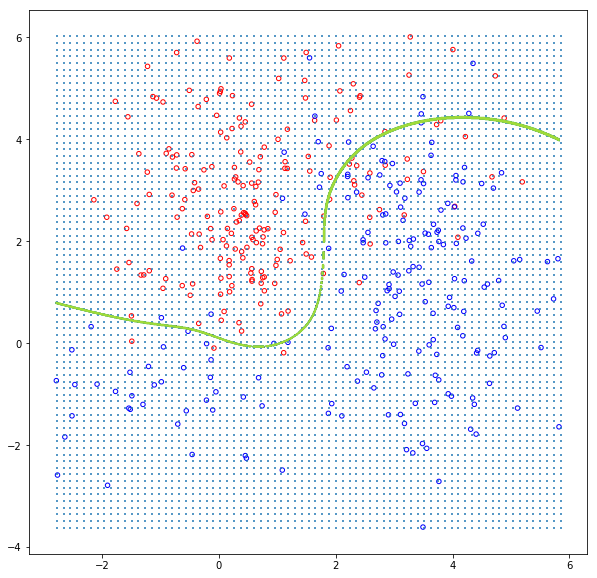

In [61]:

fig = plt.figure(figsize=(10,10))
ax = fig.gca()

plt.contour(X , Y ,  D )
plt.scatter(total[:,0] , total[:,1] ,
            s=20, facecolors='none', edgecolors=label )
x = np.linspace(x_min , x_max , num = 75)
y = np.linspace(y_min, y_max  , num = 75)
x, y = np.meshgrid(x , y )
plt.scatter(x,y, s=4, marker = 1)
plt.show()

In [62]:
total_graph = go.Scatter(
    x = total[:,0],
    y = total[:,1],
    xaxis = 'x',
    yaxis = 'y',
    mode = 'markers',
    marker = dict(color = label , size = 5) )
hist_1 = go.Histogram(
    y = total[:,1],
    xaxis = 'x2',
    marker = dict(color = "red"))

hist_2 = go.Histogram(
    x = total[:,0],
    yaxis = 'y2',
    marker = dict(color = "blue"))

grid_scatter = go.Scatter(
    x = XX[:,0],
    y = XX[:,1],
    xaxis = 'x',
    yaxis = 'y',
    mode = 'markers',
    marker = dict(color = "black" , size = 1))


data = [total_graph , hist_1 , hist_2 , grid_scatter]


layout = go.Layout(
    autosize = False,
    xaxis = dict( zeroline = False,
                  domain = [0,0.85],
                  showgrid = False ),
    yaxis = dict( zeroline = False,
                  domain = [0,0.85],
                  showgrid = False),
    xaxis2 = dict(zeroline = False,
                  domain = [0.85,1],
                  showgrid = False),
    yaxis2 = dict(zeroline = False,
                  domain = [0.85,1],
                  showgrid = False),
    height = 600,
    width = 600,
    bargap = 0,
    hovermode = 'closest',
    showlegend = False
)

fig = go.Figure(data=data,layout=layout)
py.iplot(fig, filename='2D GMM 1D Histogram')

/usr/local/lib/python3.5/dist-packages/plotly/plotly/plotly.py:230: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



The draw time for this plot will be slow for all clients.


/usr/local/lib/python3.5/dist-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Too Long

/usr/local/lib/python3.5/dist-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [10]:
x = np.linspace(x_min , x_max , num = 75)
y = np.linspace(y_min, y_max  , num = 75)
x, y = np.meshgrid(x , y )


In [11]:
np.set_printoptions(threshold=np.inf)

In [12]:
grid_xy = np.concatenate((x[:, : , np.newaxis],
                     y[:, : , np.newaxis]),
                    axis = 2)

In [13]:
reshape_grid = grid_xy.reshape(75*75 , 2)
print(total.shape , reshape_grid.shape)

(400, 2) (5625, 2)


In [14]:
import sys
import numpy as np
from scipy.spatial.distance import cdist

In [15]:
metric = "euclidean"
dist = cdist( reshape_grid, total, metric=metric )

## 확인 
* 실제로 `eculidean` 기준으로 해서 잘 된 건지.

In [16]:
a = np.sqrt(np.sum(np.square(reshape_grid[0,:] - total[0,:])))
b = dist[0,0]
print(a==b)

True


## 1: Blue , 0 : Red

* index > 200 , `Blue`
* index <= 200 , `Red`

##  color

* prob > 0.5 `Blue`
* prob < 0.5 `Red`
* prob == 0.5 `Black`


In [17]:
## 1 : blue , 0 : red 
k = 100
arg_min_k = np.argpartition(dist, np.argmin(dist, axis=1))[:, :k]

change_type = np.where(arg_min_k >= 200  ,  1 , 0 )
prob = np.sum(change_type , axis = 1 ) / k
choice = np.where(prob > 0.5 , "blue" ,
         np.where(prob < 0.5 , "red", "black"))
collections.Counter(choice)

Counter({'black': 55, 'blue': 2916, 'red': 2654})

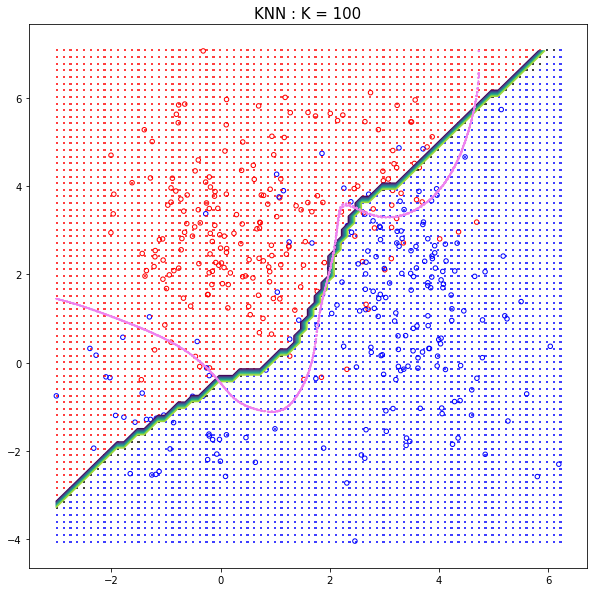

In [18]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
pp = np.where(np.array(prob).reshape(75 , 75) >= 0.5 , 1 , 0)
plt.contour(x , y , pp )
plt.contour(X , Y ,  D , colors='violet' , linestyles  ="dotted")
plt.scatter(total[:,0] , total[:,1] ,
            s=20, facecolors='none', edgecolors= label )
x = np.linspace(x_min , x_max , num = 75)
y = np.linspace(y_min, y_max  , num = 75)
x, y = np.meshgrid(x , y )
plt.scatter(x,y, s=5, marker = 1 , c = choice)
plt.title("KNN : K = {}".format(k) , fontsize = 15)
plt.show()

In [19]:
pred_dict = {}
for i , j in enumerate(choice) :
    pred_dict.update({ i : j})

In [20]:
sample_pred = np.argmin(dist , axis = 0 ) 
pred = pd.DataFrame(sample_pred).replace(pred_dict)
train_acc = np.sum(pred.T.values[0] == np.array(label)) / len(label)

In [23]:
def knn_acc(dist , k , n) :
    # 기존은 위의 방법, 밑에는 더 빠르게 하기위해 바꾼 방법.
    #arg_min_k = np.argpartition(dist, np.argmin(dist, axis=1))[:, :k]
    arg_min_k = dist.apply(lambda x : np.argpartition(x , k)[ : k], axis=1).values
    change_type = np.where(arg_min_k >= n  ,  1 , 0 )
    prob = np.sum(change_type , axis = 1 ) / k
    choice = np.where(prob > 0.5 , "blue" ,
             np.where(prob < 0.5 , "red", "black"))
    pred_dict = {}
    ## 한 점마다 0.5의 기준으로 색깔이 분류가 된다. 
    ## 이 색깔이 분류가 된 점을 Dictionary 형태로 가져온다.
    for i , j in enumerate(choice) :
        pred_dict.update({ i : j})
    ## 그 다음 샘플에서 가장 거리가 가까운 grid 점을 찾고
    ## 그 점이 가지는 색깔이 곧 예측한 Class라고 할 수 있다고 생각한다.
    sample_pred = np.argmin(dist.values , axis = 0 ) 
    ## 이 부분에서 오래걸리는 것 같다. 
    ## Data Sample에서 한개당 한번씩 훑어서 느린 것 같다.
    pred = pd.DataFrame(sample_pred, columns = ["idx"])["idx"].map(pred_dict)
    train_acc = np.sum(pred.T.values == np.array(label)) / len(label)
    train_error = 1 - train_acc
    return train_error

## 예측 방법

* 점 별로 색깔의 확률값(0.5)를 기준으로 분류
* 그 점을 index를 dictionary 형태로 만든다.
* 샘플에서 가장 가까운 점을 찾는다.
* 가장 가까운 점의 클래스가 곧 자신의 클래스 된다라고 생각하고 구현함.

In [24]:
%%time

step = np.linspace(1, 100 , num= 30).astype(int).tolist()
step = [2] + step
step = list(np.sort(step))
store = []
dist2 = pd.DataFrame(dist)
for i in step :
    print(i)
    store.append(knn_acc(dist2 , i , n = 200))

1
2
4
7
11
14
18
21
24
28
31
35
38
41
45
48
52
55
59
62
65
69
72
76
79
82
86
89
93
96
100
CPU times: user 53.9 s, sys: 268 ms, total: 54.1 s
Wall time: 54.2 s


In [26]:
n = 2500
mix_1 = mixture_5(mean = mean , cov = cov , p =  p , N= n)
mix_2 = mixture_5(mean = mean , cov = cov , p =  p , N= n)
label = ["red"] * n  + ["blue"]  * n
total  = np.concatenate((mix_1 , mix_2), axis = 0)

grid_n = 100 ## 1000 개 메모리 에러 발생.
x_min, x_max = total[:,0].min() - .01, total[:,0].max() + .01
y_min, y_max = total[:,1].min() - .01, total[:,1].max() + .01
x = np.linspace(x_min , x_max , num = grid_n)
y = np.linspace(y_min, y_max  , num = grid_n)
x, y = np.meshgrid(x , y )

grid_xy = np.concatenate((x[:, : , np.newaxis],
                     y[:, : , np.newaxis]),
                    axis = 2)
reshape_grid = grid_xy.reshape(grid_n*grid_n , 2)
print(total.shape , reshape_grid.shape)
metric = "euclidean"
dist = cdist( reshape_grid, total, metric=metric )

(5000, 2) (10000, 2)


## 매우 느리지만, 개선함.
    * test 샘플이 3000개로 했을 때 거리를 구하다보니 연산량이 많아 시간이 오래 걸림.
    * test 총 9min 35s  -> 2min 28s 개선

In [29]:
%%time

test_store = []
dist2 = pd.DataFrame(dist)
for i in step :
    test_store.append( knn_acc(dist2 , i  , n = n) )

1
2
4
7
11
14
18
21
24
28
31
35
38
41
45
48
52
55
59
62
65
69
72
76
79
82
86
89
93
96
100
CPU times: user 2min 20s, sys: 7.96 s, total: 2min 28s
Wall time: 2min 28s


## 개선 사항

In [35]:
import time
start_1 = time.time()
k = 4
arg_min_k = np.argpartition(dist, np.argmin(dist, axis=1))[:, :k]
arg_min_k.shape
end_1 = time.time()

start_2 = time.time()
dist_t = pd.DataFrame(dist)
dd = dist_t.apply(lambda x : np.argpartition(x , 4)[:4], axis=1)
end_2 = time.time()

print("전 : {:.2f}초 --> 후 : {:.2f}초 ".format(end_1 - start_1 , end_2 - start_2))

전 : 17.72초 --> 후 : 3.66초 


In [52]:
step = np.linspace(1, 100 , num= 30).astype(int).tolist()
step = [2] + step
step = list(np.sort(step))
step_reverse = list(1 / np.array(step))


trace = go.Scatter(
    x = step_reverse,
    y = store,
    mode = 'lines+markers',
    name ='Training Erros',
)
trace2 = go.Scatter(
    x = step_reverse,
    y = test_store,
    mode = 'lines+markers',
    name ='Test Errors',
)
trace_line = go.Scatter(
    x= step_reverse,
    y= [np.min(test_store)-0.01] * len(step),
    name = "minimum test error" , 
    mode ='lines'
)
data = [trace , trace2 , trace_line]

layout = dict(title = 'K-Nearest Neighbors',
              xaxis = dict(title = '1 / K'),
              yaxis = dict(title = 'Error Rates'),
              width=1000,
              height=700,
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='basic-line')

/usr/local/lib/python3.5/dist-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



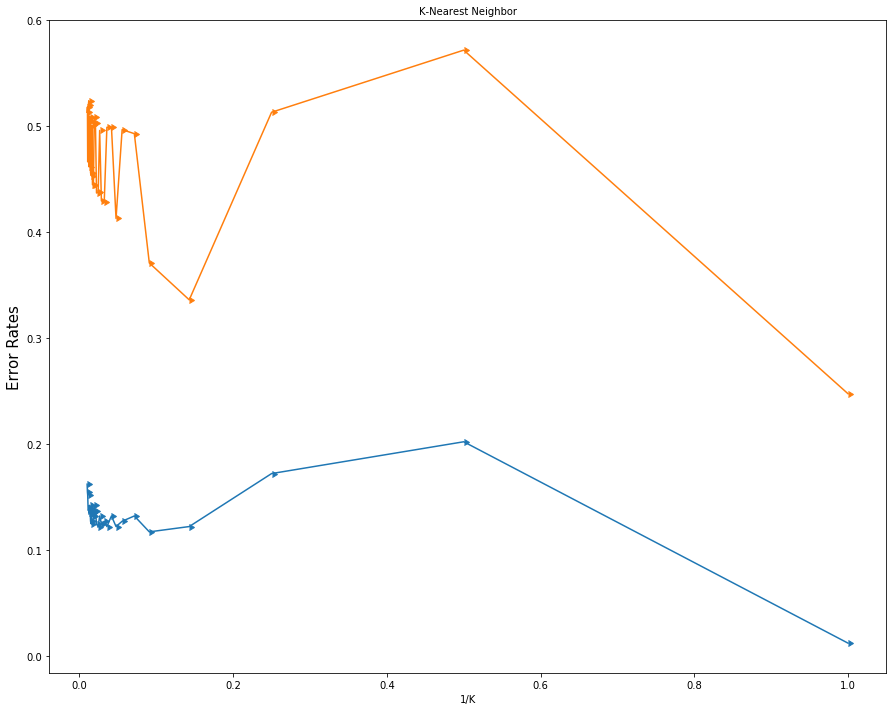

In [51]:
step = np.linspace(1, 100 , num= 30).astype(int).tolist()
step = [2] + step
step = list(np.sort(step))
step_reverse = list(1 / np.array(step))
plt.figure(figsize=(15,12))
plt.plot(step_reverse , store , marker = 9 )
plt.plot(step_reverse , test_store , marker = 9)
plt.title("K-Nearest Neighbor", fontsize = 10)
plt.xlabel("1/K", fontsize = 10)
plt.ylabel("Error Rates", fontsize = 15)
plt.show()